In [1]:
import h5py

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets

from matplotlib.patches import Rectangle

In [2]:
f = h5py.File('/home/atuin/b143dc/b143dc15/Experiments/2023-10-18_Terra_Diffusion_iEPI/meas_MID00124_FID00287_ep2d_diff_20dir_MB2/JETS_PHASE-NAVI-REDU.h5', 'r')
DWI_JETS_NAVI = f['DWI'][:]
f.close()

print('DWI_JETS_NAVI shape: ', DWI_JETS_NAVI.shape)

f = h5py.File('/home/atuin/b143dc/b143dc15/Experiments/2023-10-18_Terra_Diffusion_iEPI/meas_MID00124_FID00287_ep2d_diff_20dir_MB2/JETS_PHASE-IMAG-REDU.h5', 'r')
DWI_JETS_SELF = f['DWI'][:]
f.close()

f = h5py.File('/home/atuin/b143dc/b143dc15/Softwares/DeepDWI/examples/2024-05-22_zsssl_0.7mm_21-dir_R2x2_vol1_scan1_kdat_slice_040_norm-kdat-1.0_navi_ResNet2D_ResBlock-12_kernel-3_ADMM_08_lamda-0.050_Adam_lr-0.000500_MixL1L2Loss/zsssl_test_shot-retro-0.h5', 'r')
DWI_ZS_NAVI = f['DWI'][:]
f.close()

f = h5py.File('/home/atuin/b143dc/b143dc15/Softwares/DeepDWI/examples/2024-05-23_zsssl_0.7mm_21-dir_R2x2_vol1_scan1_kdat_slice_040_norm-kdat-1.0_self_ResNet2D_ResBlock-12_kernel-3_ADMM_08_lamda-0.050_Adam_lr-0.000500_MixL1L2Loss/zsssl_test_shot-retro-0.h5', 'r')
DWI_ZS_SELF = f['DWI'][:]
f.close()

print('DWI_ZS_SELF shape: ', DWI_ZS_SELF.shape)

DWI_JETS_NAVI shape:  (21, 176, 286, 286)
DWI_ZS_SELF shape:  (21, 176, 286, 286)


102


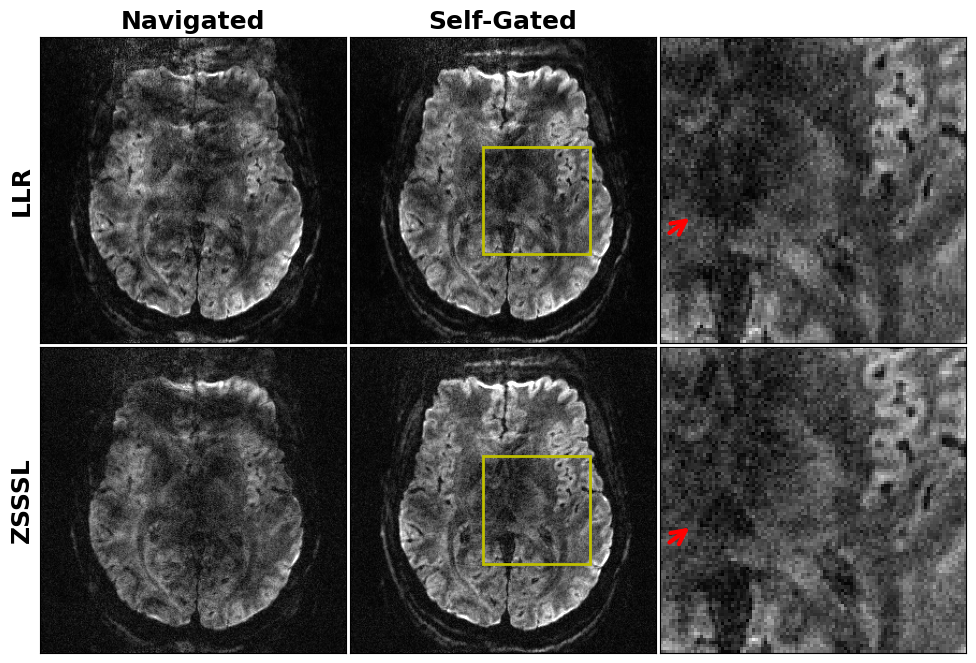

In [29]:
N_diff, N_z, N_y, N_x = DWI_JETS_NAVI.shape

N_row = 2
N_col = 3

fig, ax = plt.subplots(N_row, N_col, figsize=(N_col*4, N_row*4))

fontsize = 9

fig_size = fig.get_size_inches()
fig_width = fig_size[0]
fontsize = fontsize * (fig_width / 6)

vmax = np.amax(abs(DWI_JETS_NAVI)) * 0.04

slice_idx = 89

diff_idx_motion0 = 19
diff_idx_motion1 = 11


# motion 1
ax[0][0].imshow(abs(np.flip(DWI_JETS_NAVI[diff_idx_motion1, slice_idx, :, :], axis=-2)),
                cmap='gray', interpolation=None,
                vmin=0, vmax=vmax)

ax[0][1].imshow(abs(np.flip(DWI_JETS_SELF[diff_idx_motion1, slice_idx, :, :], axis=-2)),
                cmap='gray', interpolation=None,
                vmin=0, vmax=vmax)

ax[0][0].set_title('Navigated', fontsize=fontsize, weight='bold')
ax[0][1].set_title('Self-Gated', fontsize=fontsize, weight='bold')


ax[1][0].imshow(abs(np.flip(DWI_ZS_NAVI[diff_idx_motion1, slice_idx, :, :], axis=-2)),
                cmap='gray', interpolation=None,
                vmin=0, vmax=vmax)

ax[1][1].imshow(abs(np.flip(DWI_ZS_SELF[diff_idx_motion1, slice_idx, :, :], axis=-2)),
                cmap='gray', interpolation=None,
                vmin=0, vmax=vmax)


rect_x0 = int(N_x//2.3)
rect_y0 = int(N_y//2.8)

rect_w = 100


Rect = Rectangle((rect_x0, rect_y0), rect_w, rect_w, edgecolor='y', facecolor='none', linewidth=2)
ax[0][1].add_patch(Rect)

Rect = Rectangle((rect_x0, rect_y0), rect_w, rect_w, edgecolor='y', facecolor='none', linewidth=2)
ax[1][1].add_patch(Rect)


img = abs(np.flip(DWI_JETS_SELF[diff_idx_motion1, slice_idx, :, :], axis=-2))
ax[0][2].imshow(img[rect_y0 : rect_y0+rect_w, rect_x0 : rect_x0+rect_w],
                cmap='gray', interpolation=None,
                vmin=0, vmax=vmax)

ax[0][2].annotate("", xy=(0.10*rect_w, 0.58*rect_w), xytext=(0.02*rect_w, 0.64*rect_w),
                   arrowprops=dict(arrowstyle="->", color='r', linewidth=3,
                                   mutation_scale=25))

img = abs(np.flip(DWI_ZS_SELF[diff_idx_motion1, slice_idx, :, :], axis=-2))
ax[1][2].imshow(img[rect_y0 : rect_y0+rect_w, rect_x0 : rect_x0+rect_w],
                cmap='gray', interpolation=None,
                vmin=0, vmax=vmax)

ax[1][2].annotate("", xy=(0.10*rect_w, 0.58*rect_w), xytext=(0.02*rect_w, 0.64*rect_w),
                   arrowprops=dict(arrowstyle="->", color='r', linewidth=3,
                                   mutation_scale=25))


for m in range(N_row):
    for n in range(N_col):
        ax[m][n].axes.xaxis.set_ticks([])
        ax[m][n].axes.yaxis.set_ticks([])

        ax[m][n].axes.xaxis.set_ticks([])
        ax[m][n].axes.yaxis.set_ticks([])

ax[0][0].set_ylabel('LLR', fontsize=fontsize, weight='bold')
ax[1][0].set_ylabel('ZSSSL', fontsize=fontsize, weight='bold')

plt.subplots_adjust(wspace=0, hspace=0.01)

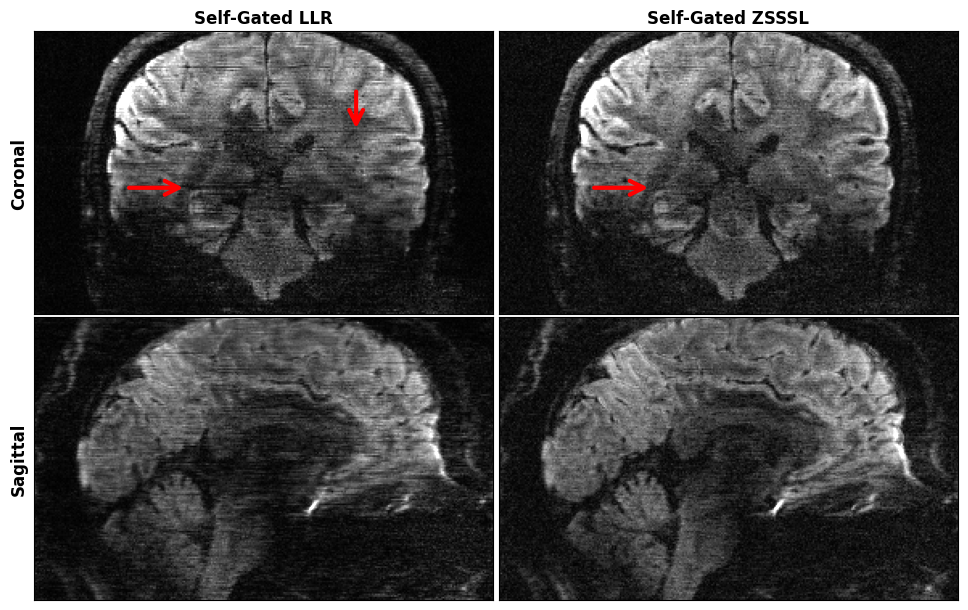

In [39]:
N_row, N_col = 2, 2

f, ax = plt.subplots(N_row, N_col, figsize=(N_col*6, N_row*6*(N_z/N_x)))

diff_idx = 11

cor_slice_idx = 124
sag_slice_idx = 150

fontsize = 12

# cor
img = abs(np.flip(DWI_JETS_SELF[diff_idx, :, cor_slice_idx, :], axis=-2))
ax[0][0].imshow(img,
                cmap='gray', interpolation=None,
                vmin=0, vmax=np.amax(img)*0.6)

img = abs(np.flip(DWI_ZS_SELF[diff_idx, :, cor_slice_idx, :], axis=-2))
ax[0][1].imshow(img,
                cmap='gray', interpolation=None,
                vmin=0, vmax=np.amax(img)*0.6)


ax[0][0].annotate("", xy=(0.33*N_x, 0.55*N_z), xytext=(0.20*N_x, 0.55*N_z),
                   arrowprops=dict(arrowstyle="->", color='r', linewidth=3,
                                   mutation_scale=25))

ax[0][1].annotate("", xy=(0.33*N_x, 0.55*N_z), xytext=(0.20*N_x, 0.55*N_z),
                   arrowprops=dict(arrowstyle="->", color='r', linewidth=3,
                                   mutation_scale=25))

ax[0][0].annotate("", xy=(0.70*N_x, 0.35*N_z), xytext=(0.70*N_x, 0.20*N_z),
                   arrowprops=dict(arrowstyle="->", color='r', linewidth=3,
                                   mutation_scale=25))

# sag
img = abs(np.flip(DWI_JETS_SELF[diff_idx, :, :, sag_slice_idx], axis=-2))
ax[1][0].imshow(img,
                cmap='gray', interpolation=None,
                vmin=0, vmax=np.amax(img)*0.6)

img = abs(np.flip(DWI_ZS_SELF[diff_idx, :, :, sag_slice_idx], axis=-2))
ax[1][1].imshow(img,
                cmap='gray', interpolation=None,
                vmin=0, vmax=np.amax(img)*0.6)



for m in range(N_row):
    for n in range(N_col):
        ax[m][n].axes.xaxis.set_ticks([])
        ax[m][n].axes.yaxis.set_ticks([])

        ax[m][n].axes.xaxis.set_ticks([])
        ax[m][n].axes.yaxis.set_ticks([])

ax[0][0].set_title('Self-Gated LLR', fontsize=fontsize, weight='bold')
ax[0][1].set_title('Self-Gated ZSSSL', fontsize=fontsize, weight='bold')

ax[0][0].set_ylabel('Coronal', fontsize=fontsize, weight='bold')
ax[1][0].set_ylabel('Sagittal', fontsize=fontsize, weight='bold')

plt.subplots_adjust(wspace=0, hspace=0.01)

### coronal

In [5]:
slice_slider = widgets.IntSlider(min=0, max=DWI_ZS_SELF.shape[-2] - 1, step=1, value=0)

diff_slider = widgets.IntSlider(min=0, max=DWI_ZS_SELF.shape[-4] - 1, step=1, value=0)

scale = 0.5

@widgets.interact(slice_idx=slice_slider, diff_idx=diff_slider)
def interact_plots(slice_idx, diff_idx):

    n_row, n_col = 2, 2
    fig, ax = plt.subplots(n_row, n_col, figsize=(n_col*6, n_row*6))

    # slice_idx = 124  # good
    # diff_idx = 11  # good

    img = np.flip(abs(DWI_JETS_NAVI[diff_idx, :, slice_idx, :]), axis=(-2))
    ax[0,0].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[0,0].set_title('NAVI LLR')

    img = np.flip(abs(DWI_JETS_SELF[diff_idx, :, slice_idx, :]), axis=(-2))
    ax[0,1].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[0,1].set_title('SELF LLR')

    img = np.flip(abs(DWI_ZS_NAVI[diff_idx, :, slice_idx, :]), axis=(-2))
    ax[1,0].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[1,0].set_title('NAVI ZS')

    img = np.flip(abs(DWI_ZS_SELF[diff_idx, :, slice_idx, :]), axis=(-2))
    ax[1,1].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[1,1].set_title('SELF ZS')

    for m in range(n_row):
        for n in range(n_col):
            ax[m,n].set_axis_off()

    plt.show()

interactive(children=(IntSlider(value=0, description='slice_idx', max=285), IntSlider(value=0, description='di…

### sagittal

In [4]:
slice_slider = widgets.IntSlider(min=0, max=DWI_ZS_SELF.shape[-1] - 1, step=1, value=0)

diff_slider = widgets.IntSlider(min=0, max=DWI_ZS_SELF.shape[-4] - 1, step=1, value=0)

scale = 0.5

@widgets.interact(slice_idx=slice_slider, diff_idx=diff_slider)
def interact_plots(slice_idx, diff_idx):

    n_row, n_col = 2, 2
    fig, ax = plt.subplots(n_row, n_col, figsize=(n_col*6, n_row*6))

    # slice_idx = 150 # good
    # diff_idx = 11 # good

    img = np.flip(abs(DWI_JETS_NAVI[diff_idx, :, :, slice_idx]), axis=(-2))
    ax[0,0].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[0,0].set_title('NAVI LLR')

    img = np.flip(abs(DWI_JETS_SELF[diff_idx, :, :, slice_idx]), axis=(-2))
    ax[0,1].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[0,1].set_title('SELF LLR')

    img = np.flip(abs(DWI_ZS_NAVI[diff_idx, :, :, slice_idx]), axis=(-2))
    ax[1,0].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[1,0].set_title('NAVI ZS')

    img = np.flip(abs(DWI_ZS_SELF[diff_idx, :, :, slice_idx]), axis=(-2))
    ax[1,1].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[1,1].set_title('SELF ZS')

    for m in range(n_row):
        for n in range(n_col):
            ax[m,n].set_axis_off()

    plt.show()

interactive(children=(IntSlider(value=0, description='slice_idx', max=285), IntSlider(value=0, description='di…

### axial

In [3]:
slice_slider = widgets.IntSlider(min=0, max=DWI_ZS_SELF.shape[-3] - 1, step=1, value=0)

diff_slider = widgets.IntSlider(min=0, max=DWI_ZS_SELF.shape[-4] - 1, step=1, value=0)

scale = 0.5

@widgets.interact(slice_idx=slice_slider, diff_idx=diff_slider)
def interact_plots(slice_idx, diff_idx):

    n_row, n_col = 2, 2
    fig, ax = plt.subplots(n_row, n_col, figsize=(n_col*6, n_row*6))

    # slice_idx = 88 # good
    # diff_idx = 7 # good

    img = np.flip(abs(DWI_JETS_NAVI[diff_idx, slice_idx, :, :]), axis=(-2))
    ax[0,0].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[0,0].set_title('NAVI LLR')

    img = np.flip(abs(DWI_JETS_SELF[diff_idx, slice_idx, :, :]), axis=(-2))
    ax[0,1].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[0,1].set_title('SELF LLR')

    img = np.flip(abs(DWI_ZS_NAVI[diff_idx, slice_idx, :, :]), axis=(-2))
    ax[1,0].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[1,0].set_title('NAVI ZS')

    img = np.flip(abs(DWI_ZS_SELF[diff_idx, slice_idx, :, :]), axis=(-2))
    ax[1,1].imshow(img, cmap='gray', interpolation=None,
                   vmin=0, vmax=np.amax(img)*scale)
    ax[1,1].set_title('SELF ZS')

    for m in range(n_row):
        for n in range(n_col):
            ax[m,n].set_axis_off()

    plt.show()

interactive(children=(IntSlider(value=0, description='slice_idx', max=175), IntSlider(value=0, description='di…